# 函数名，变量名与类型的内部表示

## 测试代码

### 头文件model.h

```C++
#ifndef YQ_MODEL_H
#define YQ_MODEL_H
int var_a = 20;

float calculate(float, float);

class Sobel{
public: 
    Sobel();
    int m_a;
    int getInfo(const char *);
private:
    void queryInfo(int);
};
#endif
```

### 实现文件model.cpp

```C++
#include "model.h"

float calculate(float p1, float p2){
    return p1 + p2;
}

Sobel::Sobel():m_a(88){

}

int Sobel::getInfo(const char *filename){
    return 77;
}

void Sobel::queryInfo(int id){

}

```

### 编译成目标文件

- 编译脚本

```bash
CL_ARGS    = /EHsc  \
             /MD \
             /source-charset:utf-8  \
		     /execution-charset:utf-8 \
			 /nologo

obj: model.cpp model.h
# 编译目标文件
	@cl /c $(CL_ARGS)  model.cpp


clean:
	@del *.obj *.dll *.pdb *.ilk *.exe *.lib  *.exp 2>/Nul


```

- 执行脚本后，生成obj文件
    - `vcvars64.bat`
    - `nmake obj`

## bumpbin工具查看修饰名

### 命令

- `dumpbin /symbols model.obj`

### 修饰名输出

```bash
C:\01works\13python\codes\export_all>dumpbin /symbols  model.obj
Microsoft (R) COFF/PE Dumper Version 14.24.28319.0        
Copyright (C) Microsoft Corporation.  All rights reserved.


Dump of file model.obj

File Type: COFF OBJECT

COFF SYMBOL TABLE
000 01056E9F ABS    notype       Static       | @comp.id
001 80000190 ABS    notype       Static       | @feat.00
002 00000000 SECT1  notype       Static       | .drectve
    Section length   2F, #relocs    0, #linenums    0, checksum        0
004 00000000 SECT2  notype       Static       | .debug$S
    Section length   80, #relocs    0, #linenums    0, checksum        0
006 00000000 SECT3  notype       Static       | .data
    Section length    4, #relocs    0, #linenums    0, checksum DF7BC0C8
008 00000000 SECT3  notype       External     | ?var_a@@3HA (int var_a)
009 00000000 SECT4  notype       Static       | .text$mn
    Section length   6A, #relocs    0, #linenums    0, checksum 4BDEC2ED
00B 00000000 SECT4  notype ()    External     | ?calculate@@YAMMM@Z (float __cdecl calculate(float,float))
00C 00000020 SECT4  notype ()    External     | ??0Sobel@@QEAA@XZ (public: __cdecl Sobel::Sobel(void))
00D 00000040 SECT4  notype ()    External     | ?getInfo@Sobel@@QEAAHPEBD@Z (public: int __cdecl Sobel::getInfo(char const *))
00E 00000060 SECT4  notype ()    External     | ?queryInfo@Sobel@@AEAAXH@Z (private: void __cdecl Sobel::queryInfo(int))
00F 00000000 UNDEF  notype       External     | _fltused
010 00000000 SECT5  notype       Static       | .chks64
    Section length   28, #relocs    0, #linenums    0, checksum        0

String Table Size = 0x6D bytes


C:\01works\13python\codes\export_all>nmake clean

Microsoft (R) 程序维护实用工具 14.24.28319.0 版
版权所有 (C) Microsoft Corporation。  保留所有权利。


C:\01works\13python\codes\export_all>nmake obj

C:\01works\13python\codes\export_all>dumpbin /symbols  model.obj
Microsoft (R) COFF/PE Dumper Version 14.24.28319.0        
Copyright (C) Microsoft Corporation.  All rights reserved.


Dump of file model.obj

File Type: COFF OBJECT

COFF SYMBOL TABLE
000 01056E9F ABS    notype       Static       | @comp.id  
001 80000190 ABS    notype       Static       | @feat.00  
002 00000000 SECT1  notype       Static       | .drectve
    Section length   2F, #relocs    0, #linenums    0, checksum        0
004 00000000 SECT2  notype       Static       | .debug$S
    Section length   80, #relocs    0, #linenums    0, checksum        0
006 00000000 SECT3  notype       Static       | .data
    Section length    4, #relocs    0, #linenums    0, checksum DF7BC0C8
008 00000000 SECT3  notype       External     | ?var_a@@3HA (int var_a)
009 00000000 SECT4  notype       Static       | .text$mn
    Section length   6A, #relocs    0, #linenums    0, checksum 4BDEC2ED
00B 00000000 SECT4  notype ()    External     | ?calculate@@YAMMM@Z (float __cdecl calculate(float,float))
00C 00000020 SECT4  notype ()    External     | ??0Sobel@@QEAA@XZ (public: __cdecl Sobel::Sobel(void))
00D 00000040 SECT4  notype ()    External     | ?getInfo@Sobel@@QEAAHPEBD@Z (public: int __cdecl Sobel::getInfo(char const *))
00E 00000060 SECT4  notype ()    External     | ?queryInfo@Sobel@@AEAAXH@Z (private: void __cdecl Sobel::queryInfo(int))
00F 00000000 UNDEF  notype       External     | _fltused
010 00000000 SECT5  notype       Static       | .chks64
    Section length   28, #relocs    0, #linenums    0, checksum        0

String Table Size = 0x6D bytes

  Summary

          28 .chks64
           4 .data
          80 .debug$S
          2F .drectve
          6A .text$mn

C:\01works\13python\codes\export_all>
```

- `?var_a@@3HA (int var_a)`前面部分就是修饰名。
    - 重载函数的修饰名是不同的（这里隐含着重载的实现原理）。

## 修饰名转换工具

- 修饰名转换工具：C++ Name Undecorator (Undname.exe)
    - 用于还原修饰过的名字。

```bash
C:\01works\13python\codes\export_all>undname ??0Sobel@@QEAA@XZ
Microsoft (R) C++ Name Undecorator
Copyright (C) Microsoft Corporation. All rights reserved.

Undecoration of :- "??0Sobel@@QEAA@XZ"
is :- "public: __cdecl Sobel::Sobel(void) __ptr64"
```

## 修饰名与DLL符号调用

- 修饰名在编译目标(.obj)文件的时候就按照规则生成修饰名，修饰名在内部使用会自动转换，一般对用户来讲是不可见的，也不需要使用。
    - 修饰名在lib中使用，用来内部处理映射关系。
    - 在dll层不存在修饰名。

# 导出类，函数与变量

## 导出变量

### 头文件

```C++
#ifndef YQ_MODEL_H
#define YQ_MODEL_H
int var_a;
int var_b;

float calculate(float, float);

class Sobel{
public: 
    Sobel();
    int m_a;
    int getInfo(const char *);
private:
    void queryInfo(int);
};
#endif
```

### 实现文件

```C++
#include "model.h"

float calculate(float p1, float p2){
    var_a = 99;
    var_b = 199;
    return p1 + p2;
}

Sobel::Sobel():m_a(88){

}

int Sobel::getInfo(const char *filename){
    return 77;
}

void Sobel::queryInfo(int id){

}

```

### def文件

```bash
LIBRARY libmodel
EXPORTS
    calculate            @1
    ?var_a@@3HA          @2 DATA
    var_b                @3 DATA

```

### 编译脚本

```bash
CL_ARGS    = /EHsc  \
             /MD \
             /source-charset:utf-8  \
		     /execution-charset:utf-8 \
			 /nologo

obj: model.cpp model.h
# 编译目标文件
	@cl /c $(CL_ARGS)  model.cpp
# 链接动态库
	@link /MACHINE:X64 /NOLOGO /DLL /DEF:model.def model.obj

main: main.cpp
	@cl $(CL_ARGS) main.cpp /link /OUT:main.exe  
clean:
	@del *.obj *.dll *.pdb *.ilk *.exe *.lib  *.exp 2>/Nul

```

### 查看lib的导出

```bash
C:\01works\13python\codes\export_all>dumpbin /exports model.lib
Microsoft (R) COFF/PE Dumper Version 14.24.28319.0
Copyright (C) Microsoft Corporation.  All rights reserved.


Dump of file model.lib

File Type: LIBRARY

     Exports

       ordinal    name

             1    ?calculate@@YAMMM@Z (float __cdecl calculate(float,float))
             2    ?var_a@@3HA (int var_a)
             3    ?var_b@@3HA (int var_b)

  Summary

          C6 .debug$S
          14 .idata$2
          14 .idata$3
           8 .idata$4
           8 .idata$5
           E .idata$6

C:\01works\13python\codes\export_all>
```

### 查看dll的导出

```bash
C:\01works\13python\codes\export_all>dumpbin /exports libmodel.dll
Microsoft (R) COFF/PE Dumper Version 14.24.28319.0        
Copyright (C) Microsoft Corporation.  All rights reserved.


Dump of file libmodel.dll

File Type: DLL

  Section contains the following exports for libmodel.dll 

    00000000 characteristics
    FFFFFFFF time date stamp
        0.00 version
           1 ordinal base
           3 number of functions
           3 number of names

    ordinal hint RVA      name

          2    0 00003040 ?var_a@@3HA
          1    1 00001000 calculate
          3    2 00003044 var_b

  Summary

        1000 .data
        1000 .pdata
        1000 .rdata
        1000 .reloc
        1000 .text

C:\01works\13python\codes\export_all>
```

### 调用导出的变量

```C++
#include <iostream>
#include <windows.h>

#pragma comment(lib, "model.lib")
__declspec(dllimport) int var_a;
__declspec(dllimport) int var_b;

float calculate(float, float);

int main(int argc, const char *argv){
    std::cout << "---------------编译调用-------------------" << std::endl;
    std::cout << var_a << std::endl;
    std::cout << var_b << std::endl;
    std::cout << calculate(45.0, 55.0) << std::endl;   
    std::cout << var_a << std::endl;
    std::cout << var_b << std::endl;

    std::cout << "---------------动态调用-------------------" << std::endl;
    HMODULE h = LoadLibraryA("libmodel.dll");
    if(h == NULL){
        std::cout << "加载动态库文件失败！" << std::endl;
        return -1;
    }
    else{
        std::cout << "加载动态库文件成功！" << std::endl;
    }
    // 查找符号函数
    // FARPROC v = GetProcAddress(h, "var_b");    // 注意def中的定义
    FARPROC v = GetProcAddress(h, "?var_a@@3HA");
    if(v == NULL){
        std::cout << "查找变量失败！" << std::endl;
        // 释放加载的库
        FreeLibrary(h);
        return -1;
    }
    else{
        std::cout << "查找变量成功！" << std::endl;
    }
    // 调用变量
    std::cout << *(int*)v << std::endl;

    FreeLibrary(h);
    
    return 0;
}

```

- 执行结果

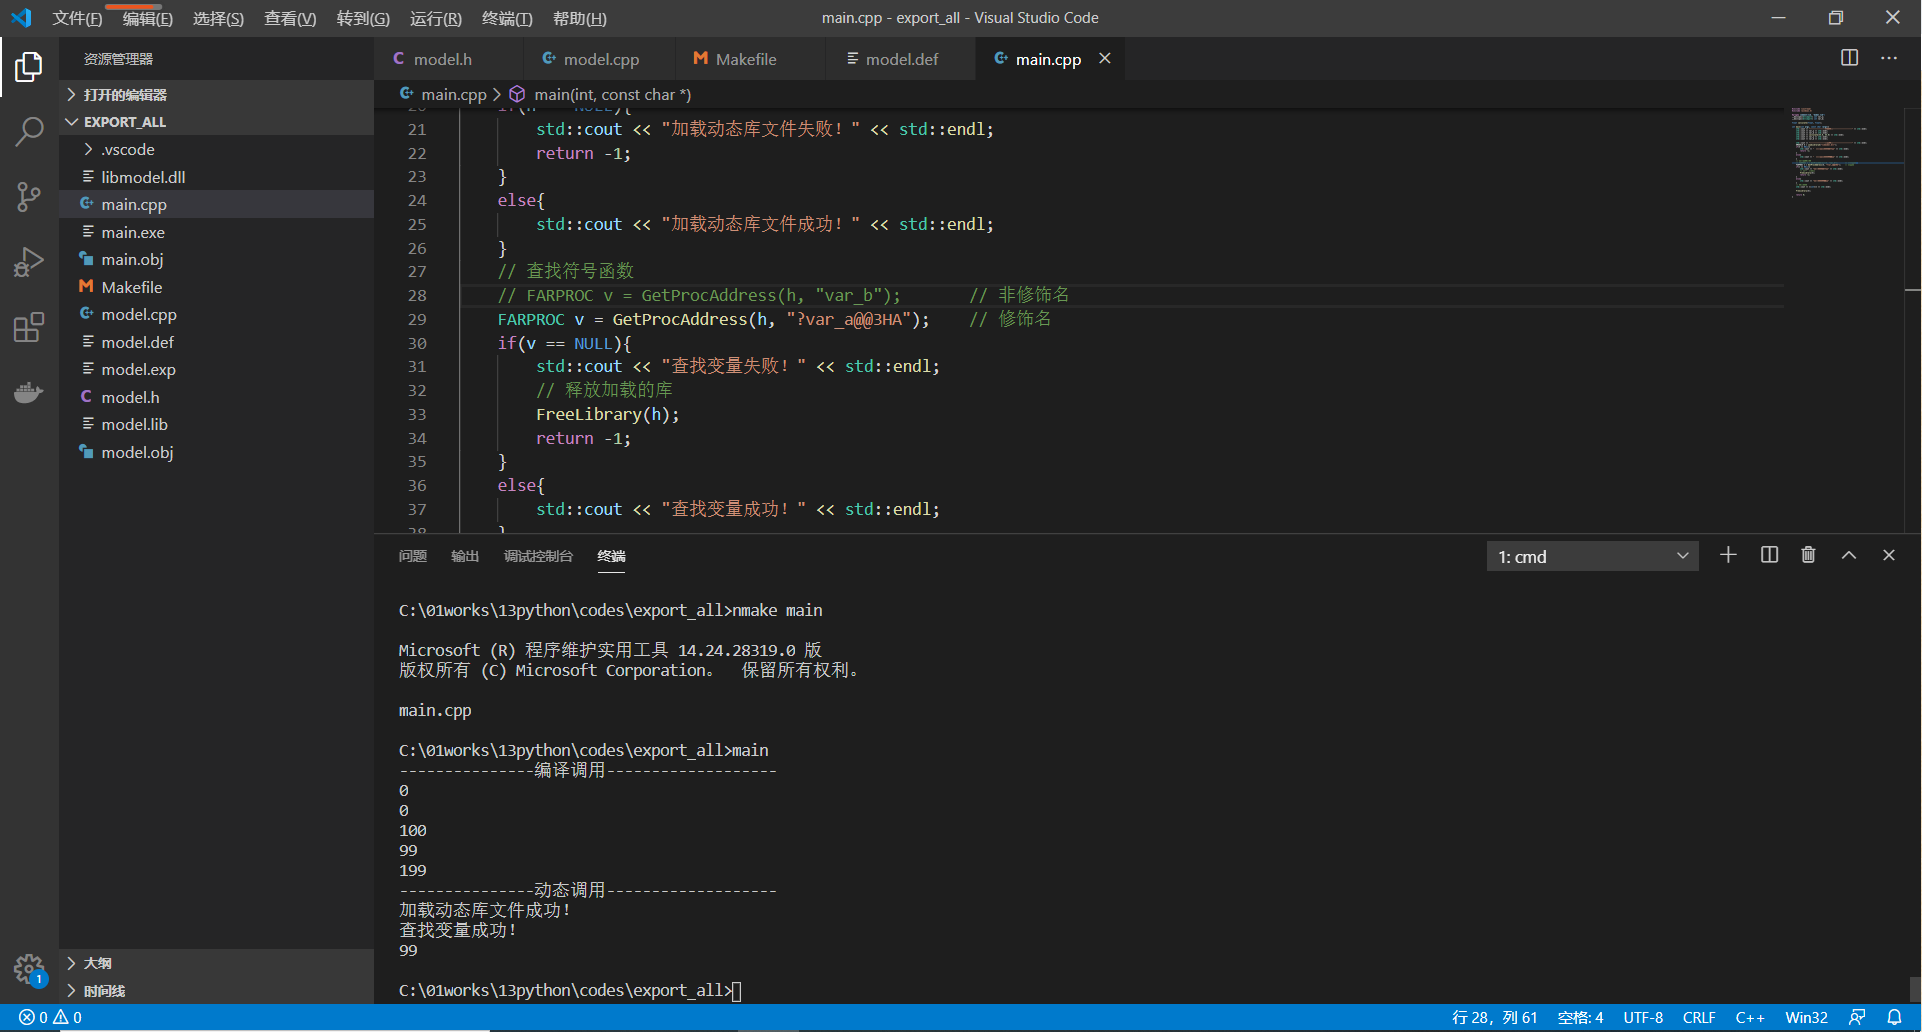

- 总结：
    1. 编程源代码为目标文件，开始对变量做修饰处理；
    2. dll没有使用修饰名；lib内部使用修饰名；
    3. 编译调用程序源代码也是采用修饰名匹配；
    4. def中可以使用原名字，也可以使用修饰名。

## 导出类

- 其中.cpp文件做了点改动

```C++
#include "model.h"

float calculate(float p1, float p2){
    var_a = 99;
    var_b = 199;
    return p1 + p2;
}

Sobel::Sobel():m_a(88){

}

int Sobel::getInfo(const char *filename){
    return m_a;
}

void Sobel::queryInfo(int id){

}

```

### 确定修饰名

- 首先编译成目标文件

```bash

C:\01works\13python\codes\def_class>dumpbin /symbols model.obj
Microsoft (R) COFF/PE Dumper Version 14.24.28319.0        
Copyright (C) Microsoft Corporation.  All rights reserved.


Dump of file model.obj

File Type: COFF OBJECT

COFF SYMBOL TABLE
000 01056E9F ABS    notype       Static       | @comp.id  
001 80000190 ABS    notype       Static       | @feat.00
002 00000000 SECT1  notype       Static       | .drectve
    Section length   2F, #relocs    0, #linenums    0, checksum        0
004 00000000 SECT2  notype       Static       | .debug$S
    Section length   80, #relocs    0, #linenums    0, checksum        0
006 00000000 SECT3  notype       Static       | .bss
    Section length    8, #relocs    0, #linenums    0, checksum        0
008 00000000 SECT3  notype       External     | ?var_a@@3HA (int var_a)
009 00000004 SECT3  notype       External     | ?var_b@@3HA (int var_b)
00A 00000000 SECT4  notype       Static       | .text$mn
    Section length   8A, #relocs    2, #linenums    0, checksum 3B5C665F
00C 00000000 SECT4  notype ()    External     | ?calculate@@YAMMM@Z (float __cdecl calculate(float,float))
00D 00000040 SECT4  notype ()    External     | ??0Sobel@@QEAA@XZ (public: __cdecl Sobel::Sobel(void))
00E 00000060 SECT4  notype ()    External     | ?getInfo@Sobel@@QEAAHPEBD@Z (public: int __cdecl Sobel::getInfo(char const *))
00F 00000080 SECT4  notype ()    External     | ?queryInfo@Sobel@@AEAAXH@Z (private: void __cdecl Sobel::queryInfo(int))
010 00000000 UNDEF  notype       External     | _fltused
011 00000000 SECT5  notype       Static       | .chks64
    Section length   28, #relocs    0, #linenums    0, checksum        0

String Table Size = 0x79 bytes

  Summary

           8 .bss
          28 .chks64
          80 .debug$S
          2F .drectve
          8A .text$mn
```

- 其中我们需要导出的类的成员

```bash
00D 00000040 SECT4  notype ()    External     | ??0Sobel@@QEAA@XZ (public: __cdecl Sobel::Sobel(void))
00E 00000060 SECT4  notype ()    External     | ?getInfo@Sobel@@QEAAHPEBD@Z (public: int __cdecl Sobel::getInfo(char const *))
00F 00000080 SECT4  notype ()    External     | ?queryInfo@Sobel@@AEAAXH@Z (private: void __cdecl Sobel::queryInfo(int))
```

### 编写def文件：model.def

```C++
LIBRARY libmodel
EXPORTS
    ??0Sobel@@QEAA@XZ              @1
    ?getInfo@Sobel@@QEAAHPEBD@Z    @2
    ?queryInfo@Sobel@@AEAAXH@Z     @3

```

### 编译dll

```bash
CL_ARGS    = /EHsc  \
             /MD \
             /source-charset:utf-8  \
		     /execution-charset:utf-8 \
			 /nologo

obj: model.cpp model.h
# 编译目标文件
	@cl /c $(CL_ARGS)  model.cpp
# 链接动态库
	@link /MACHINE:X64 /NOLOGO /DLL /DEF:model.def model.obj

main: main.cpp
	@cl $(CL_ARGS) main.cpp /link /OUT:main.exe  
clean:
	@del *.obj *.dll *.pdb *.ilk *.exe *.lib  *.exp 2>/Nul


```

### 查看model.lib的导出符号

- 命令：`dumpbin /exports model.lib`

```bash
C:\01works\13python\codes\def_class>dumpbin /exports model.lib
Microsoft (R) COFF/PE Dumper Version 14.24.28319.0
Copyright (C) Microsoft Corporation.  All rights reserved.


Dump of file model.lib

File Type: LIBRARY

     Exports

       ordinal    name

             1    ??0Sobel@@QEAA@XZ (public: __cdecl Sobel::Sobel(void))
             2    ?getInfo@Sobel@@QEAAHPEBD@Z (public: int __cdecl Sobel::getInfo(char const *))
             3    ?queryInfo@Sobel@@AEAAXH@Z (private: void __cdecl Sobel::queryInfo(int))

  Summary

          C6 .debug$S
          14 .idata$2
          14 .idata$3
           8 .idata$4
           8 .idata$5
           E .idata$6

C:\01works\13python\codes\def_class>
```

### 查看model.dll导出的符号

- 命令：`dumpbin /exports libmodel.dll`

```bash
C:\01works\13python\codes\def_class>dumpbin /exports libmodel.dll
Microsoft (R) COFF/PE Dumper Version 14.24.28319.0
Copyright (C) Microsoft Corporation.  All rights reserved.


Dump of file libmodel.dll

File Type: DLL

  Section contains the following exports for libmodel.dll

    00000000 characteristics
    FFFFFFFF time date stamp
        0.00 version
           1 ordinal base
           3 number of functions
           3 number of names

    ordinal hint RVA      name

          1    0 00001040 ??0Sobel@@QEAA@XZ
          2    1 00001060 ?getInfo@Sobel@@QEAAHPEBD@Z
          3    2 00001080 ?queryInfo@Sobel@@AEAAXH@Z

  Summary

        1000 .data
        1000 .pdata
        1000 .rdata
        1000 .reloc
        1000 .text

C:\01works\13python\codes\def_class>
```

### 调用导出的类

```C++
#include <iostream>
#include <windows.h>
#include "model.h"

#pragma comment(lib, "model.lib")

typedef Sobel (*builder)();

int main(int argc, const char *argv){
    std::cout << "---------------编译调用-------------------" << std::endl;
    Sobel s;   // 构造对象
    int re = s.getInfo("Hello"); // 调用成员
    std::cout << "动态库调用结果:" << re << std::endl; 
    
    std::cout << "---------------编译调用-------------------" << std::endl;
    HMODULE h = LoadLibraryA("libmodel.dll");
    if(h == NULL){
        std::cout << "加载动态库文件失败！" << std::endl;
        return -1;
    }
    else{
        std::cout << "加载动态库文件成功！" << std::endl;
    }
    // 查找符号函数
    FARPROC cls_name = GetProcAddress(h, MAKEINTRESOURCEA(1)); 
    FARPROC cls_getInfo = GetProcAddress(h, MAKEINTRESOURCEA(2));    
    if(cls_name == NULL || cls_getInfo == NULL){
        std::cout << "查找类或者成员函数失败！" << std::endl;
        // 释放加载的库
        FreeLibrary(h);
        return -1;
    }
    else{
        std::cout << "查找类构造器与成员函数成功！" << std::endl;
    }
    // 调用变量
    builder con = (builder)cls_name;
    Sobel sobel = con();
    int r = sobel.getInfo("Hello"); // 调用成员
    std::cout << "动态库手工调用结果:" << r << std::endl; 
    std::cout << "---------------------------------------" << std::endl;
    int (*cal)(const char *) =(int (*)(const char *)) cls_getInfo;     // 没有对象依赖，指向没有初始化的全局栈位置。
    std::cout << "动态库手工调用结果:" << cal("world") << std::endl;
    FreeLibrary(h);
    
    return 0;
}

```

- 问题：
    - 怎样使用成员函数与对象绑定调用？ 参考网上方法，使用的是汇编，使用汇编切换对象栈，但是VCx64位不支持内涵嵌入汇编。
    - 实际上面的代码也能使用使用，关键是想找到成员函数与对象栈一起工作的方法。

------

# 附录

- 顺便说一下，def的方法已经不再推荐使用，这类梳理下只是理解程序运行的技巧而已。通用的方法还是使用
    -  `__declspec(dllexport)`
    -  `__declspec(dllimport)`

-------